# Analyse des données brutes : boxplot, variance, écart type

#### Lecture du fichier 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

# Lecture des données présentes dans le dépôt
train_data_file = "store_train.data"
train_data_df = pd.read_csv(train_data_file ,sep=" ",header=None, names = ["Store", "DayOfWeek", "Date", "Customers", "Open", "Promo", "StateHoliday", "ScoolHoliday"])
train_data_df.head() 



,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,ScoolHoliday
0,625,3,2013-11-06,641,1,1,0,0
1,293,2,2013-07-16,877,1,1,0,1
2,39,4,2014-01-23,561,1,1,0,0
3,676,4,2013-09-26,1584,1,1,0,0
4,709,3,2014-01-22,1477,1,1,0,0


In [3]:
train_solutions_file = "store_train.solution"
train_solutions_df = pd.read_csv(train_solutions_file ,sep=" ",header=None, names = ["ObservedSales"])
train_solutions_df.head()


,ObservedSales
0,7293
1,7060
2,4565
3,6380
4,11647


In [4]:

train_df = train_data_df.join(train_solutions_df, how = 'right')
# Vérification du contenu
# Label of the data : Store, DayOfWeek, Date, Customers, Open, Promo, StateHoliday, SchoolHoliday
train_df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,ScoolHoliday,ObservedSales
0,625,3,2013-11-06,641,1,1,0,0,7293
1,293,2,2013-07-16,877,1,1,0,1,7060
2,39,4,2014-01-23,561,1,1,0,0,4565
3,676,4,2013-09-26,1584,1,1,0,0,6380
4,709,3,2014-01-22,1477,1,1,0,0,11647


In [5]:
# train_df["Store"] = pd.Categorical(train_df["STATION"],ordered=False)

train_df["Store"] = pd.DataFrame(train_df["Store"], dtype=int)
train_df["DayOfWeek"] = pd.DataFrame(train_df["DayOfWeek"], dtype=int)
train_df["Date"] = pd.DataFrame(train_df["Date"], dtype="datetime64[ns]")
train_df["Customers"] = pd.DataFrame(train_df["Customers"], dtype=int)
train_df["Open"] = pd.DataFrame(train_df["Open"], dtype=bool)
train_df["Promo"] = pd.DataFrame(train_df["Promo"], dtype=bool)
train_df["StateHoliday"] = pd.DataFrame(train_df["StateHoliday"], dtype=bool)
train_df["ScoolHoliday"] = pd.DataFrame(train_df["ScoolHoliday"], dtype=bool)
train_df["ObservedSales"] = pd.DataFrame(train_df["ObservedSales"], dtype=int)

train_df.dtypes


Store                     int32
DayOfWeek                 int32
Date             datetime64[ns]
Customers                 int32
Open                       bool
Promo                      bool
StateHoliday               bool
ScoolHoliday               bool
ObservedSales             int32
dtype: object

In [12]:
train_df.describe()

,Store,DayOfWeek,Customers,ObservedSales
count,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,4.000265,633.399958,5776.336748
std,321.898476,1.996580,464.360651,3851.273075
min,1.000000,1.000000,0.000000,0.000000
25%,280.000000,2.000000,405.000000,3729.000000
50%,558.000000,4.000000,609.000000,5746.000000
75%,837.000000,6.000000,838.000000,7859.000000
max,1115.000000,7.000000,5494.000000,41551.000000


In [13]:
# Plot observed sales en fonction de la date
train_df['Month'] = train_df['Date'].map(lambda d: d.month)
train_df['Year'] = train_df['Date'].map(lambda d: d.year)
train_df['Day'] = train_df['Date'].map(lambda d: d.day)
train_df.describe()

,Store,DayOfWeek,Customers,ObservedSales,Month,Year,Day
count,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,4.000265,633.399958,5776.336748,5.846452,2013.832593,15.708815
std,321.898476,1.996580,464.360651,3851.273075,3.325709,0.777333,8.793081
min,1.000000,1.000000,0.000000,0.000000,1.000000,2013.000000,1.000000
25%,280.000000,2.000000,405.000000,3729.000000,3.000000,2013.000000,8.000000
50%,558.000000,4.000000,609.000000,5746.000000,6.000000,2014.000000,16.000000
75%,837.000000,6.000000,838.000000,7859.000000,8.000000,2014.000000,23.000000
max,1115.000000,7.000000,5494.000000,41551.000000,12.000000,2015.000000,31.000000


# Entrainement des modèles


**creation d'un set de données de test**

In [14]:
msk = np.random.rand(len(train_df)) < 0.8

train = train_df[msk]
test = train_df[~msk]
print("La taille de l'echantillon d'entrainement vaut {}".format(len(train)))
print("La taille de l'echantillon de test vaut {}".format(len(test)))
train.head()


La taille de l'echantillon d'entrainement vaut 569888
La taille de l'echantillon de test vaut 142157


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,ScoolHoliday,ObservedSales,Month,Year,Day
2,39,4,2014-01-23,561,True,True,True,False,4565,1,2014,23
3,676,4,2013-09-26,1584,True,True,True,False,6380,9,2013,26
5,914,6,2014-10-04,877,True,False,True,False,7967,10,2014,4
6,1022,3,2013-06-05,789,True,True,True,False,7101,6,2013,5
7,764,4,2013-12-26,0,False,False,True,True,0,12,2013,26


In [ ]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
# scatter_matrix(train_df[["Customers","ObservedSales","Store","DayOfWeek"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
scatter_matrix(train[["Customers","ObservedSales","Store","DayOfWeek", 'Month', 'Year', 'Day']], alpha=0.2, figsize=(15, 15)) # représentation en histogrammes
plt.show()


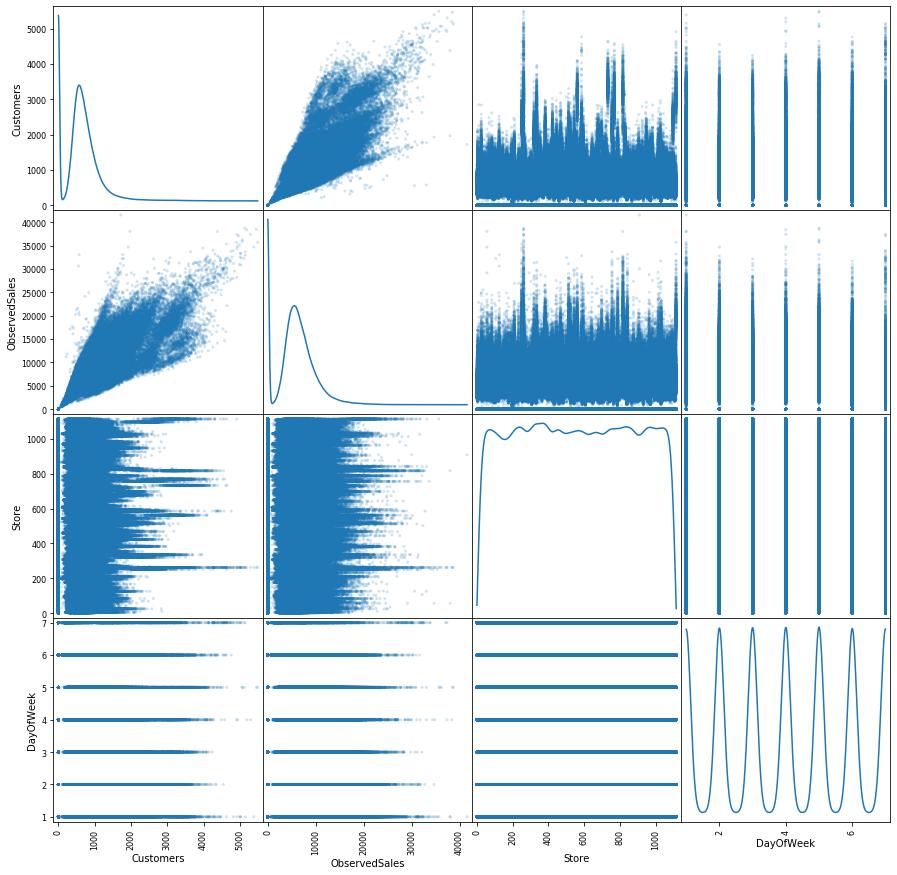
### Analyse du scatter matrix
Globalement, on observe que plus il y a de clients plus il y a de vente ce qui semble évident avec une bonne corrélation.
On observe qu'il y a des magasins qui sont plus appréciés que d'autres avec des pics de visites de clients. 
Et ainsi, certains magasins se régalent au niveau des ventes.
On pourrait classer les magasins selon leurs ventes. 


## ACP

<BarContainer object of 7 artists>

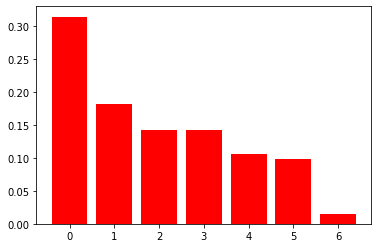

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X = scale(train[["Store", "DayOfWeek", "Customers","ObservedSales","Month", 'Year', "Day"]])

pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
pca.explained_variance_ratio_

plt.bar(range(X.shape[1]), pca.explained_variance_ratio_, color="r", align="center")

## Décroissance de la variance expliquée
# plt.plot(pca.explained_variance_ratio_)
# plt.show()

<BarContainer object of 6 artists>

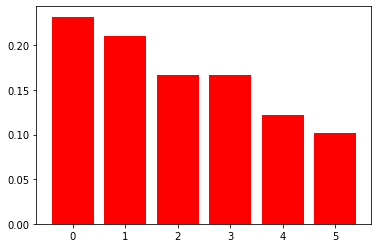

In [16]:
X_without_results = scale(train[["Store", "DayOfWeek", "Customers","Month", 'Year', "Day"]])
pca2 = PCA()
C2 = pca2.fit(X_without_results).transform(X_without_results)
pca2.explained_variance_ratio_
plt.bar(range(X_without_results.shape[1]), pca2.explained_variance_ratio_, color="r", align="center")


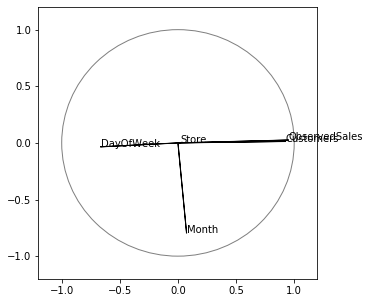

In [17]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, train_df[["Store", "DayOfWeek", "Customers","ObservedSales","Month"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

## Regression lineaire sur les composantes principales (RCP)

In [ ]:
Xtrain = train.iloc[:,1:6]
ytrain = 

In [89]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split  
train_df_without_results = train_df[["Customers","Store","DayOfWeek", 'Month', 'Year', 'Day']]
train_df_y = train_df["ObservedSales"]

X_train, X_test, Y_train, Y_test=train_test_split(train_df_without_results,train_df_y,test_size=200,random_state=11)

#x_train = [pca.components_[0], pca.components_[1], pca.components_[2], pca.components_[3]]
#y_train = train["ObservedSales"].values
 


In [90]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)


In [91]:
from sklearn import linear_model
# Erreur quadratique moyenne

from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Y_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Y_test,prev))
from sklearn.metrics import r2_score
print("R2=",r2_score(Y_test,prev))

MSE= 1102729.9176858417
R2= 0.8970775654759847


## Lasso on non scaled data

In [92]:
regLasso_non_scaled = linear_model.Lasso()
regLasso_non_scaled.fit(X_train,Y_train)
prev = regLasso_non_scaled.predict(X_test)
print("MSE=",mean_squared_error(Y_test,prev))
from sklearn.metrics import r2_score
print("R2=",r2_score(Y_test,prev))

MSE= 1102798.7935393914
R2= 0.8970711370020551


### Let's find the optimum alpha for the lasso regression on scaled data

In [93]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.0001, 0.001, 0.002, 0.005, 0.01]}] # 0.05,0.1,0.2,0.3,0.4,0.5,1
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))


Meilleur R2 = 0.818447, Meilleur paramètre = {'alpha': 0.002}


In [94]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Y_train)
model_lasso.coef_
prev=model_lasso.predict(Xr_test)
print("MSE=",mean_squared_error(Y_test, prev))
from sklearn.metrics import r2_score
print("R2=",r2_score(Y_test,prev))

MSE= 1102584.897135454
R2= 0.8970911008556479


In [95]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 6 variables et en supprime 0


# Calcul sur les données

In [96]:
# Lecture des données présentes dans le dépôt
test_data_file = "store_test.data"
test_data_df = pd.read_csv(test_data_file ,sep=" ",header=None, names = ["Store", "DayOfWeek", "Date", "Customers", "Open", "Promo", "StateHoliday", "ScoolHoliday"])
test_data_df.head() 
len(test_data_df)

203444

In [97]:
test_data_df["Store"] = pd.DataFrame(train_df["Store"], dtype=int)
test_data_df["DayOfWeek"] = pd.DataFrame(train_df["DayOfWeek"], dtype=int)
test_data_df["Date"] = pd.DataFrame(train_df["Date"], dtype="datetime64[ns]")
test_data_df["Customers"] = pd.DataFrame(train_df["Customers"], dtype=int)
test_data_df["Open"] = pd.DataFrame(train_df["Open"], dtype=bool)
test_data_df["Promo"] = pd.DataFrame(train_df["Promo"], dtype=bool)
test_data_df["StateHoliday"] = pd.DataFrame(train_df["StateHoliday"], dtype=bool)
test_data_df["ScoolHoliday"] = pd.DataFrame(train_df["ScoolHoliday"], dtype=bool)
test_data_df["ObservedSales"] = pd.DataFrame(train_df["ObservedSales"], dtype=int)

test_data_df.dtypes


Store                     int32
DayOfWeek                 int32
Date             datetime64[ns]
Customers                 int32
Open                       bool
Promo                      bool
StateHoliday               bool
ScoolHoliday               bool
ObservedSales             int32
dtype: object

In [98]:
test_data_df['Month'] = train_df['Date'].map(lambda d: d.month)
test_data_df['Year'] = train_df['Date'].map(lambda d: d.year)
test_data_df['Day'] = train_df['Date'].map(lambda d: d.day)
train_df.describe()

test_df_without_results = test_data_df[["Customers","Store","DayOfWeek", 'Month', 'Year', 'Day']]
X_test_non_scaled = test_data_df[["Customers","Store","DayOfWeek", 'Month', 'Year', 'Day']]


## On scaled data with the optimal model

In [99]:
X_test = scaler.transform(test_df_without_results) 
prev_test = model_lasso.predict(X_test)
print(prev_test)
np.savetxt("store_test.predict", prev_test,  fmt='%i')

[ 6125.33405563  7951.55443657  5230.78440401 ...  3684.03022923
  4635.19819909 15340.27084792]


## On non scaled data

In [88]:
prev_non_scaled = regLasso_non_scaled.predict(X_test_non_scaled)
print(len(X_test))
print(prev_non_scaled)
print(len(prev_non_scaled))
np.savetxt("store_test.predict", prev_test,  fmt='%i')

203444
[ 6125.49586516  7952.43591872  5231.48640402 ...  3681.56429264
  4633.84788938 15338.81646897]
203444


Text(0.5, 1.0, 'Coefficients du modèle lasso')

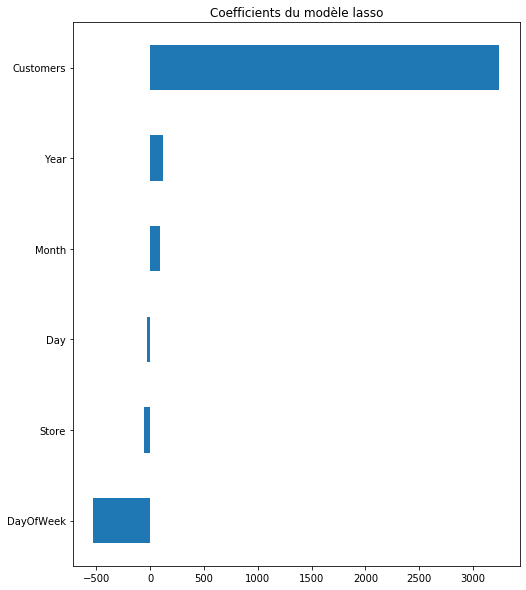

In [57]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(100,10000,1))/10000.,n_jobs=-1,random_state=13).fit(Xr_train,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

# Regularisation Ridge
https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507811-tp-comparez-le-comportement-du-lasso-et-de-la-regression-ridge

In [37]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)


In [41]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(Xr_train, Y_train)
    coefs.append(ridge.coef_)
    errors.append([np.mean((ridge.predict(Xr_test) - Y_test) ** 2)])

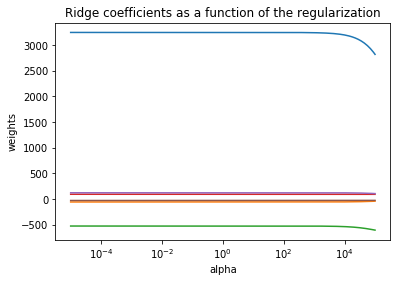

In [42]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

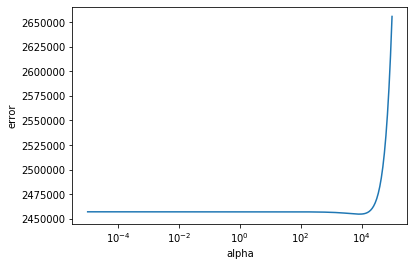

In [52]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [53]:
min(errors)

[2454777.599982986]

# Utilisation de sklearn.linear_model.RidgeCV qui effectue une recherche des meilleurs paramètres par validation croisée